<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Belambus_Selatan/Belambus_Selatan_LIM_YLIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_belambus_selatan"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [6]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_belambus_selatan
Rows: 855
Columns: 16
Shape: (855, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
0.3773632049560547

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,855.0,5.922185,3.674509,0.000000,3.000000,6.000000,8.675000,17.000000
To,855.0,6.635050,3.670369,0.300000,3.740000,6.400000,9.000000,18.000000
Interval,855.0,0.712865,0.294277,0.120000,0.450000,0.700000,1.000000,1.500000
CoreRec,855.0,0.991234,0.124041,0.260000,1.000000,1.000000,1.000000,3.100000
WetW,855.0,3.850371,1.839270,0.400000,2.295000,3.820000,5.206500,10.265000
H2O,855.0,23.257950,15.081707,0.639000,10.320500,22.187000,34.205500,65.541000
DryW,855.0,3.015953,1.621328,0.245000,1.620000,2.910000,4.309000,8.515000
WTF,855.0,1.869734,0.466007,0.722426,1.581269,1.811992,2.092399,4.652560
DTF,855.0,1.436012,0.438915,0.318491,1.131333,1.440388,1.737027,3.169096



Unique GEN_LYR count: 7
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,461
BRK,163
SAP,134
SAPX,46
SAPB,31
LIMX,12
LIMB,8



Unique Material count: 25
Top Material value counts:


,count
Material,
YLIM,189
Lim,128
ESAP,85
RLIM,80
Sap,49
BR,44
SAP,40
SPT,36
HGT,35



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [92]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(10))

Masukkan GEN_LYR yang ingin difilter: LIM
Masukkan Material yang ingin difilter: YLIM

Filtered rows: 168


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
2,CS8170210,BATU BERANI,Belambus_Selatan,1.20,2.00,0.80,1.0,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945
3,CS8170210,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,1.0,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881
4,CS8170210,BATU BERANI,Belambus_Selatan,3.00,3.60,0.60,1.0,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897
23,CS8170214,BATU BERANI,Belambus_Selatan,2.65,3.00,0.35,0.8,1.785,20.378,1.421,YLIM,None,LIM,LIM,2.180499,1.736154
24,CS8170214,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.0,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898
25,CS8170214,BATU BERANI,Belambus_Selatan,4.00,4.70,0.70,1.0,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942
42,CS8170215,BATU BERANI,Belambus_Selatan,3.83,4.00,0.17,1.0,0.920,30.870,0.636,YLIM,None,LIM,LIM,1.851035,1.279628
43,CS8170215,BATU BERANI,Belambus_Selatan,4.00,4.65,0.65,1.0,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909
56,CS8170217,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.0,5.676,25.810,4.211,YLIM,None,LIM,LIM,1.941414,1.440326
57,CS8170217,BATU BERANI,Belambus_Selatan,4.00,5.00,1.00,0.9,5.183,22.053,4.040,YLIM,None,LIM,LIM,1.969765,1.535375


# Filter By Interval

Descriptive statistics for Interval:
Count: 168
Mean: 0.710238
Standard Error: 0.021551
Median: 0.7
Mode: 1.0
Standard Deviation: 0.279337
Sample Variance: 0.078029
Kurtosis: -1.402020
Skewness: -0.236280
Range: 0.9899999999999999
Minimum: 0.16
Maximum: 1.15
Sum: 119.32
Confidence Level (95%): ±0.042548

Bin calculation:
Freedman–Diaconis -> bins: 6, bin width: 0.181230
Sturges -> bins: 9, bin width: 0.110000


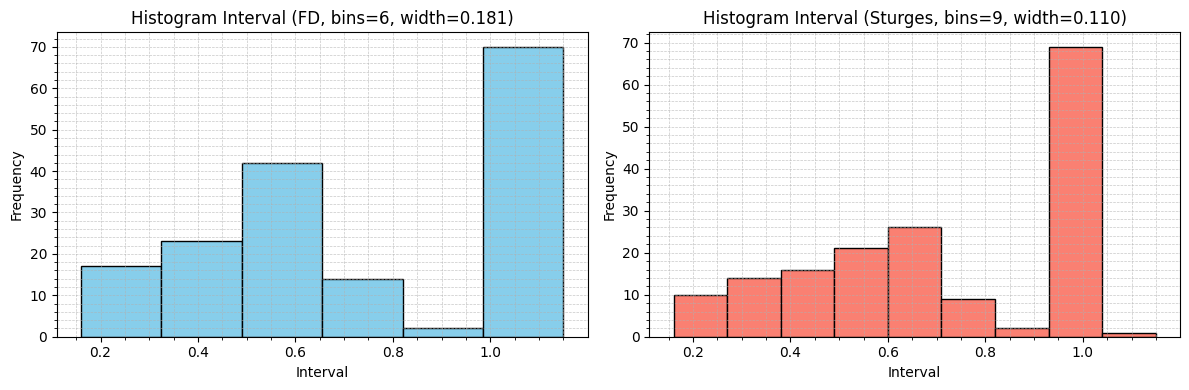


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.160,0.325,17
1,0.325,0.490,23
2,0.490,0.655,42
3,0.655,0.820,14
4,0.820,0.985,2
5,0.985,1.150,70



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.16,0.27,10
1,0.27,0.38,14
2,0.38,0.49,16
3,0.49,0.60,21
4,0.60,0.71,26
5,0.71,0.82,9
6,0.82,0.93,2
7,0.93,1.04,69
8,1.04,1.15,1


In [93]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd # Added import for pandas
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins: {bins_fd}, bin width: {h_fd:.6f}")
    print(f"Sturges -> bins: {bins_st}, bin width: {h_st:.6f}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram Interval (FD, bins={bins_fd}, width={h_fd:.3f})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={h_st:.3f})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [94]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(10))

Masukkan batas bawah (is greater than or equal to): 0.16
Masukkan batas atas (is less than or equal to): 1.04

Filtered rows: 167


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
2,CS8170210,BATU BERANI,Belambus_Selatan,1.20,2.00,0.80,1.0,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945
3,CS8170210,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,1.0,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881
4,CS8170210,BATU BERANI,Belambus_Selatan,3.00,3.60,0.60,1.0,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897
23,CS8170214,BATU BERANI,Belambus_Selatan,2.65,3.00,0.35,0.8,1.785,20.378,1.421,YLIM,None,LIM,LIM,2.180499,1.736154
24,CS8170214,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.0,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898
25,CS8170214,BATU BERANI,Belambus_Selatan,4.00,4.70,0.70,1.0,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942
42,CS8170215,BATU BERANI,Belambus_Selatan,3.83,4.00,0.17,1.0,0.920,30.870,0.636,YLIM,None,LIM,LIM,1.851035,1.279628
43,CS8170215,BATU BERANI,Belambus_Selatan,4.00,4.65,0.65,1.0,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909
56,CS8170217,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.0,5.676,25.810,4.211,YLIM,None,LIM,LIM,1.941414,1.440326
57,CS8170217,BATU BERANI,Belambus_Selatan,4.00,5.00,1.00,0.9,5.183,22.053,4.040,YLIM,None,LIM,LIM,1.969765,1.535375


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 167
Mean: 0.999222
Standard Error: 0.006964
Median: 1.0
Mode: 1.0
Standard Deviation: 0.089993
Sample Variance: 0.008099
Kurtosis: 6.879383
Skewness: 0.840634
Range: 0.7
Minimum: 0.7
Maximum: 1.4
Sum: 166.87
Confidence Level (95%): ±0.013749

Bin calculation:
Freedman–Diaconis -> bins=12, width=N/A
Sturges -> bins=9, width=0.077778


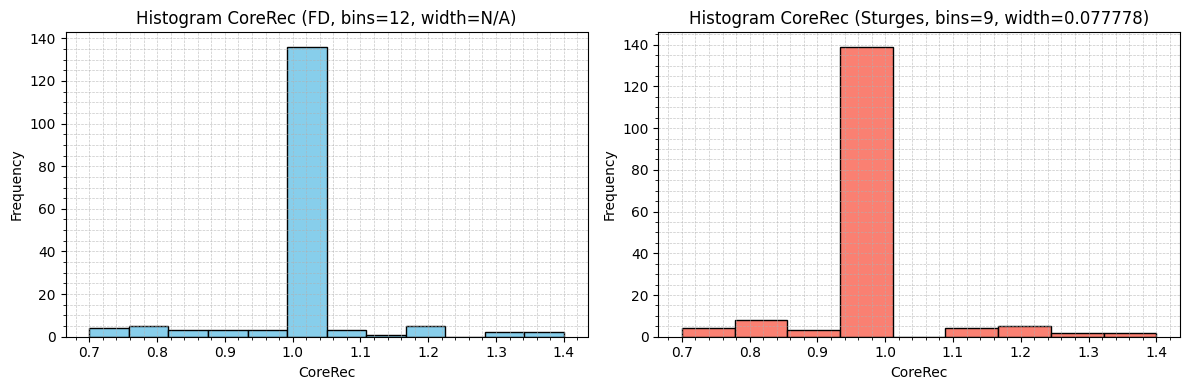


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.700000,0.758333,4
1,0.758333,0.816667,5
2,0.816667,0.875000,3
3,0.875000,0.933333,3
4,0.933333,0.991667,3
5,0.991667,1.050000,136
6,1.050000,1.108333,3
7,1.108333,1.166667,1
8,1.166667,1.225000,5
9,1.225000,1.283333,0



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.700000,0.777778,4
1,0.777778,0.855556,8
2,0.855556,0.933333,3
3,0.933333,1.011111,139
4,1.011111,1.088889,0
5,1.088889,1.166667,4
6,1.166667,1.244444,5
7,1.244444,1.322222,2
8,1.322222,1.400000,2


In [95]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram CoreRec (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [96]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.933333
Masukkan batas atas (is less than or equal to): 1.011111

Filtered rows: 139


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
2,CS8170210,BATU BERANI,Belambus_Selatan,1.200,2.000,0.800,1.00,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945
3,CS8170210,BATU BERANI,Belambus_Selatan,2.000,3.000,1.000,1.00,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881
4,CS8170210,BATU BERANI,Belambus_Selatan,3.000,3.600,0.600,1.00,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897
24,CS8170214,BATU BERANI,Belambus_Selatan,3.000,4.000,1.000,1.00,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898
25,CS8170214,BATU BERANI,Belambus_Selatan,4.000,4.700,0.700,1.00,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942
42,CS8170215,BATU BERANI,Belambus_Selatan,3.830,4.000,0.170,1.00,0.920,30.870,0.636,YLIM,None,LIM,LIM,1.851035,1.279628
43,CS8170215,BATU BERANI,Belambus_Selatan,4.000,4.650,0.650,1.00,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909
56,CS8170217,BATU BERANI,Belambus_Selatan,3.000,4.000,1.000,1.00,5.676,25.810,4.211,YLIM,None,LIM,LIM,1.941414,1.440326
67,CS8170218,BATU BERANI,Belambus_Selatan,2.000,3.000,1.000,0.94,5.968,30.107,4.171,YLIM,None,LIM,LIM,2.171615,1.517808
69,CS8170218,BATU BERANI,Belambus_Selatan,4.000,4.800,0.800,1.00,3.741,33.440,2.490,YLIM,None,LIM,LIM,1.599460,1.064597


# Filter By Wet Weight


Residual IQR dari subset (Interval=1.0, CoreRec=1.0):
Q1: -0.630, Q3: 0.702, IQR: 1.333
Lower margin: -2.629, Upper margin: 2.701


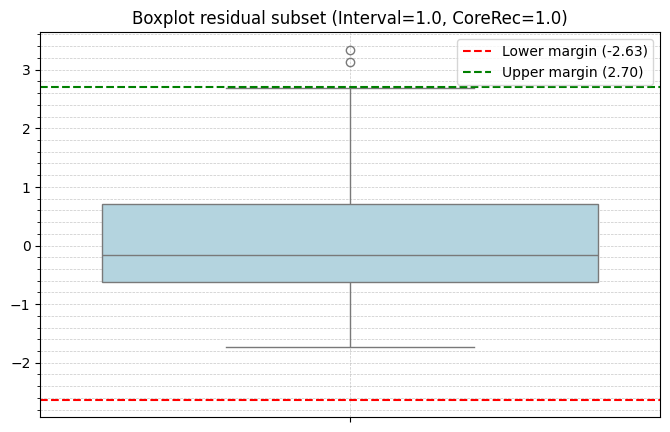

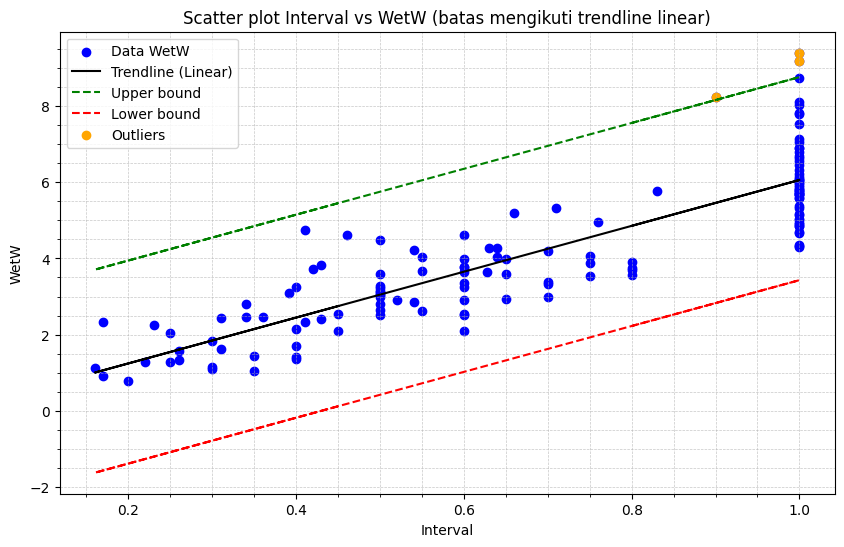


Outlier WetW berdasarkan trendline linear + IQR residual subset:
         HoleId                       Hill        Hill_Group  From   To  \
320  CS8230815R  Belambus Blok 1 Spasi 100  Belambus_Selatan   4.0  4.9   
375   CS8230818  Belambus Blok 1 Spasi 100  Belambus_Selatan   4.0  5.0   
599   CS8230869  Belambus Blok 1 Spasi 100  Belambus_Selatan   3.0  4.0   

     Interval  CoreRec   WetW     H2O   DryW Material Layer NEW_LYR GEN_LYR  \
320       0.9      1.0  8.245  25.227  6.165     YLIM   LIM     LIM     LIM   
375       1.0      1.0  9.400  30.213  6.560     YLIM  YLIM     LIM     LIM   
599       1.0      1.0  9.185  29.069  6.515     YLIM   Lim     LIM     LIM   

          WTF       DTF  Normalized_WetW Outlier_Status  
320  3.123209  2.335304            8.245         Normal  
375  3.204651  2.236438            9.400   Outlier atas  
599  3.131353  2.221096            9.185   Outlier atas  


In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        return None

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Hitung residual subset ---
    subset_X = subset['Interval'].values.reshape(-1,1)
    subset_y = subset['WetW'].values
    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR dari subset (Interval={interval_value}, CoreRec={coreRec_value}):")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title(f"Boxplot residual subset (Interval={interval_value}, CoreRec={coreRec_value})")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual subset:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [117]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-2539338653.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Outlier_Status
2,CS8170210,BATU BERANI,Belambus_Selatan,1.2,2.00,0.80,1.0,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945,3.573,Normal
3,CS8170210,BATU BERANI,Belambus_Selatan,2.0,3.00,1.00,1.0,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881,4.996,Normal
4,CS8170210,BATU BERANI,Belambus_Selatan,3.0,3.60,0.60,1.0,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897,2.544,Outlier bawah
24,CS8170214,BATU BERANI,Belambus_Selatan,3.0,4.00,1.00,1.0,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898,5.380,Normal
25,CS8170214,BATU BERANI,Belambus_Selatan,4.0,4.70,0.70,1.0,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942,3.372,Outlier bawah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,CS8230891,Belambus Blok 1 Spasi 100,Belambus_Selatan,4.0,4.50,0.50,1.0,3.585,10.739,3.200,YLIM,Lim,LIM,LIM,2.444399,2.181890,3.585,Normal
828,CS8230898,Belambus Blok 1 Spasi 100,Belambus_Selatan,1.0,1.80,0.80,1.0,3.685,2.849,3.580,YLIM,None,LIM,LIM,1.570364,1.525619,3.685,Normal
829,CS8230898,Belambus Blok 1 Spasi 100,Belambus_Selatan,1.8,2.00,0.20,1.0,0.790,3.165,0.765,YLIM,None,SAP,LIM,1.346635,1.304020,0.790,Outlier bawah
831,CS8230898,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.4,3.00,0.60,1.0,2.085,3.837,2.005,YLIM,None,LIM,LIM,1.184698,1.139242,2.085,Outlier bawah



Residual IQR dari subset (Interval=1.0, CoreRec=1.0):
Q1: -0.644, Q3: 0.688, IQR: 1.333
Lower margin: -2.643, Upper margin: 2.687


/tmp/ipython-input-2273838773.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-2273838773.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


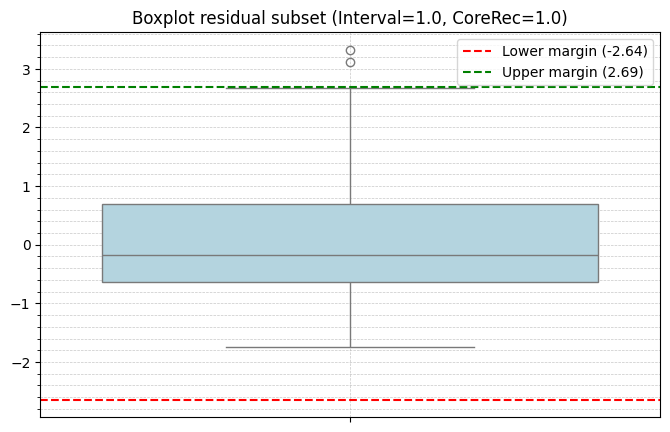

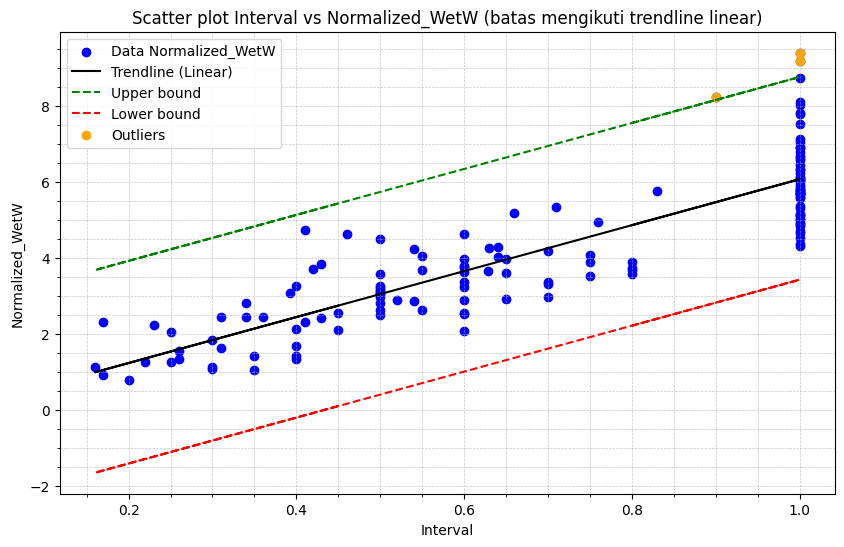

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Outlier_Status,Trendline_Pred
2,CS8170210,BATU BERANI,Belambus_Selatan,1.20,2.00,0.80,1.00,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945,3.573000,Normal,4.864279
3,CS8170210,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,1.00,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881,4.996000,Normal,6.072763
4,CS8170210,BATU BERANI,Belambus_Selatan,3.00,3.60,0.60,1.00,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897,2.544000,Normal,3.655796
24,CS8170214,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.00,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898,5.380000,Normal,6.072763
25,CS8170214,BATU BERANI,Belambus_Selatan,4.00,4.70,0.70,1.00,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942,3.372000,Normal,4.260038
42,CS8170215,BATU BERANI,Belambus_Selatan,3.83,4.00,0.17,1.00,0.920,30.870,0.636,YLIM,None,LIM,LIM,1.851035,1.279628,0.920000,Normal,1.057556
43,CS8170215,BATU BERANI,Belambus_Selatan,4.00,4.65,0.65,1.00,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909,2.924000,Normal,3.957917
56,CS8170217,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.00,5.676,25.810,4.211,YLIM,None,LIM,LIM,1.941414,1.440326,5.676000,Normal,6.072763
67,CS8170218,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,0.94,5.968,30.107,4.171,YLIM,None,LIM,LIM,2.171615,1.517808,6.348936,Normal,6.072763
69,CS8170218,BATU BERANI,Belambus_Selatan,4.00,4.80,0.80,1.00,3.741,33.440,2.490,YLIM,None,LIM,LIM,1.599460,1.064597,3.741000,Normal,4.864279


In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        return None

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Hitung residual subset ---
    subset_X = subset['Interval'].values.reshape(-1,1)
    subset_y = subset['Normalized_WetW'].values
    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR dari subset (Interval={interval_value}, CoreRec={coreRec_value}):")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title(f"Boxplot residual subset (Interval={interval_value}, CoreRec={coreRec_value})")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=8, width=1.102295
Sturges -> bins=9, width=0.956667


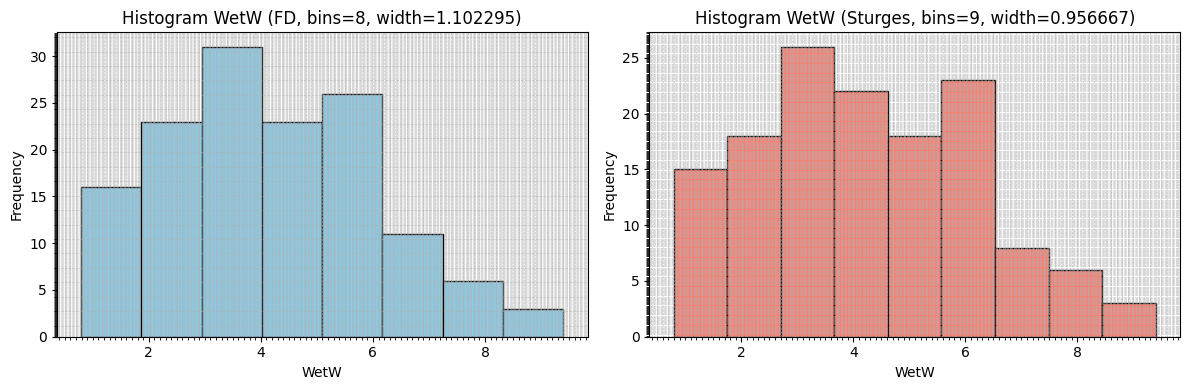


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.79000,1.86625,16
1,1.86625,2.94250,23
2,2.94250,4.01875,31
3,4.01875,5.09500,23
4,5.09500,6.17125,26
5,6.17125,7.24750,11
6,7.24750,8.32375,6
7,8.32375,9.40000,3



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.790000,1.746667,15
1,1.746667,2.703333,18
2,2.703333,3.660000,26
3,3.660000,4.616667,22
4,4.616667,5.573333,18
5,5.573333,6.530000,23
6,6.530000,7.486667,8
7,7.486667,8.443333,6
8,8.443333,9.400000,3


In [119]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [120]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter df_recovery, hasilnya disimpan ke df_wetw
df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                      (df_recovery['WetW'] <= upper_bound)].copy()

# Tambahkan kolom Outlier_Status = "Normal"
df_wetw['Outlier_Status'] = "Normal"

# Drop kolom Outlier_Status setelah ditambahkan
df_wetw = df_wetw.drop(columns=['Outlier_Status'])

print(f"\nFiltered rows: {len(df_wetw)}")
display(df_wetw.head(10))

Masukkan batas bawah (is greater than or equal to): 0.790000
Masukkan batas atas (is less than or equal to): 5.573333

Filtered rows: 99


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
2,CS8170210,BATU BERANI,Belambus_Selatan,1.20,2.00,0.80,1.0,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945,3.573,4.864279
3,CS8170210,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,1.0,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881,4.996,6.072763
4,CS8170210,BATU BERANI,Belambus_Selatan,3.00,3.60,0.60,1.0,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897,2.544,3.655796
24,CS8170214,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.0,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898,5.380,6.072763
25,CS8170214,BATU BERANI,Belambus_Selatan,4.00,4.70,0.70,1.0,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942,3.372,4.260038
42,CS8170215,BATU BERANI,Belambus_Selatan,3.83,4.00,0.17,1.0,0.920,30.870,0.636,YLIM,None,LIM,LIM,1.851035,1.279628,0.920,1.057556
43,CS8170215,BATU BERANI,Belambus_Selatan,4.00,4.65,0.65,1.0,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909,2.924,3.957917
69,CS8170218,BATU BERANI,Belambus_Selatan,4.00,4.80,0.80,1.0,3.741,33.440,2.490,YLIM,None,LIM,LIM,1.599460,1.064597,3.741,4.864279
83,CS8170220,BATU BERANI,Belambus_Selatan,5.00,5.30,0.30,1.0,1.833,22.313,1.424,YLIM,None,LIM,LIM,2.089859,1.623545,1.833,1.843071
84,CS8170220,BATU BERANI,Belambus_Selatan,5.30,6.00,0.70,1.0,3.326,36.500,2.112,YLIM,None,LIM,LIM,1.625174,1.031981,3.326,4.260038


#Filter By MC


Descriptive statistics for H2O:
Count: 99
Mean: 30.097020
Standard Error: 1.150686
Median: 31.614
Mode: 2.849
Standard Deviation: 11.449184
Sample Variance: 131.083804
Kurtosis: 0.570663
Skewness: -0.355964
Range: 61.87599999999999
Minimum: 2.849
Maximum: 64.725
Sum: 2979.605
Confidence Level (95%): ±2.283499

Bin calculation:
Freedman–Diaconis -> bins=12, width=5.409133
Sturges -> bins=8, width=7.734500


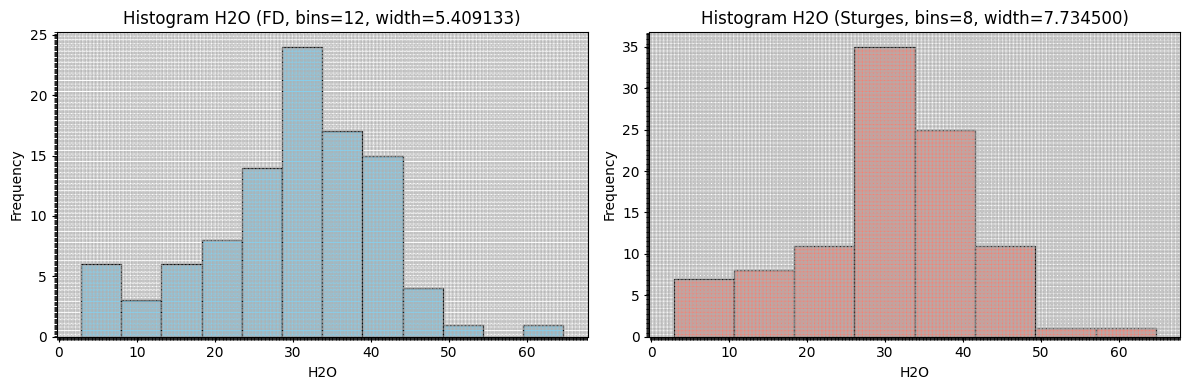


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,2.849000,8.005333,6
1,8.005333,13.161667,3
2,13.161667,18.318000,6
3,18.318000,23.474333,8
4,23.474333,28.630667,14
5,28.630667,33.787000,24
6,33.787000,38.943333,17
7,38.943333,44.099667,15
8,44.099667,49.256000,4
9,49.256000,54.412333,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,2.8490,10.5835,7
1,10.5835,18.3180,8
2,18.3180,26.0525,11
3,26.0525,33.7870,35
4,33.7870,41.5215,25
5,41.5215,49.2560,11
6,49.2560,56.9905,1
7,56.9905,64.7250,1


In [121]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [122]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 13.161667
is less than or equal to: 44.099667

Filtered rows (H2O): 84


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
2,CS8170210,BATU BERANI,Belambus_Selatan,1.20,2.00,0.80,1.0,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945,3.573,4.864279
3,CS8170210,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,1.0,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881,4.996,6.072763
4,CS8170210,BATU BERANI,Belambus_Selatan,3.00,3.60,0.60,1.0,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897,2.544,3.655796
24,CS8170214,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.0,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898,5.380,6.072763
25,CS8170214,BATU BERANI,Belambus_Selatan,4.00,4.70,0.70,1.0,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942,3.372,4.260038
42,CS8170215,BATU BERANI,Belambus_Selatan,3.83,4.00,0.17,1.0,0.920,30.870,0.636,YLIM,None,LIM,LIM,1.851035,1.279628,0.920,1.057556
43,CS8170215,BATU BERANI,Belambus_Selatan,4.00,4.65,0.65,1.0,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909,2.924,3.957917
69,CS8170218,BATU BERANI,Belambus_Selatan,4.00,4.80,0.80,1.0,3.741,33.440,2.490,YLIM,None,LIM,LIM,1.599460,1.064597,3.741,4.864279
83,CS8170220,BATU BERANI,Belambus_Selatan,5.00,5.30,0.30,1.0,1.833,22.313,1.424,YLIM,None,LIM,LIM,2.089859,1.623545,1.833,1.843071
84,CS8170220,BATU BERANI,Belambus_Selatan,5.30,6.00,0.70,1.0,3.326,36.500,2.112,YLIM,None,LIM,LIM,1.625174,1.031981,3.326,4.260038


# Filter By DTF


Descriptive statistics for DTF:
Count: 84
Mean: 1.401108
Standard Error: 0.045780
Median: 1.288394836
Mode: 1.738693803
Standard Deviation: 0.419582
Sample Variance: 0.176049
Kurtosis: 1.759775
Skewness: 1.121312
Range: 2.315680014
Minimum: 0.662359544
Maximum: 2.978039558
Sum: 117.69303650699999
Confidence Level (95%): ±0.091055

Bin calculation:
Freedman–Diaconis -> bins=11, width=0.220627
Sturges -> bins=8, width=0.289460


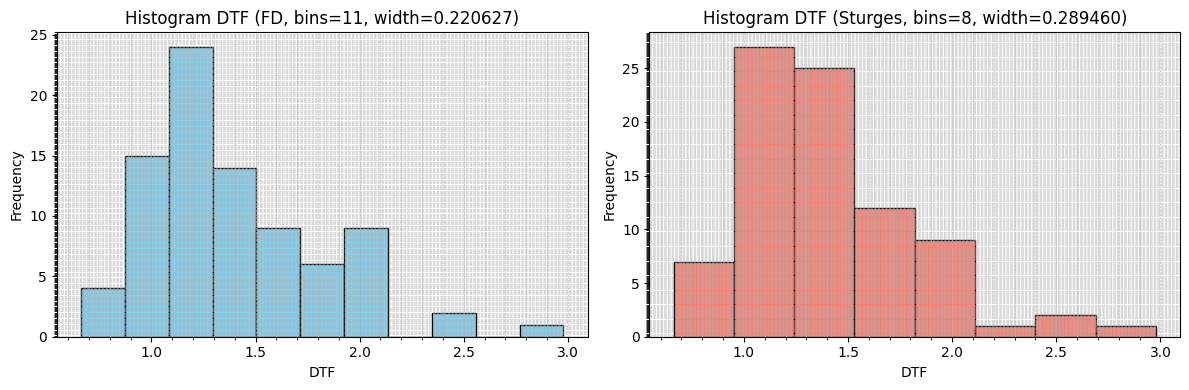


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.662360,0.872876,4
1,0.872876,1.083392,15
2,1.083392,1.293909,24
3,1.293909,1.504425,14
4,1.504425,1.714941,9
5,1.714941,1.925458,6
6,1.925458,2.135974,9
7,2.135974,2.346490,0
8,2.346490,2.557007,2
9,2.557007,2.767523,0



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.66236,0.95182,7
1,0.95182,1.24128,27
2,1.24128,1.53074,25
3,1.53074,1.82020,12
4,1.82020,2.10966,9
5,2.10966,2.39912,1
6,2.39912,2.68858,2
7,2.68858,2.97804,1


In [123]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [124]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(89))

is greater than or equal to: 0.872876
is less than or equal to: 1.925458

Filtered rows (DTF): 68


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
2,CS8170210,BATU BERANI,Belambus_Selatan,1.20,2.00,0.80,1.0,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945,3.573,4.864279
3,CS8170210,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,1.0,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881,4.996,6.072763
4,CS8170210,BATU BERANI,Belambus_Selatan,3.00,3.60,0.60,1.0,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897,2.544,3.655796
24,CS8170214,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.0,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898,5.380,6.072763
25,CS8170214,BATU BERANI,Belambus_Selatan,4.00,4.70,0.70,1.0,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942,3.372,4.260038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,CS8230886,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.40,3.00,0.60,1.0,3.360,27.083,2.450,YLIM,Lim,LIM,LIM,1.909154,1.392091,3.360,3.655796
711,CS8230886,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.54,0.54,1.0,2.860,36.538,1.815,YLIM,Lim,LIM,LIM,1.805615,1.145871,2.860,3.293251
712,CS8230886,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.54,3.70,0.16,1.0,1.130,39.381,0.685,YLIM,Lim,LIM,LIM,2.407750,1.459565,1.130,0.997132
714,CS8230886,Belambus Blok 1 Spasi 100,Belambus_Selatan,4.00,4.25,0.25,1.0,1.275,33.333,0.850,YLIM,Lim,LIM,LIM,1.738694,1.159129,1.275,1.540950


# SUMMARY

In [125]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 68
Mean: 0.626324
Standard Error: 0.029555
Median: 0.6
Mode: 1.0
Standard Deviation: 0.243714
Sample Variance: 0.059397
Kurtosis: -0.826190
Skewness: 0.135963
Range: 0.84
Minimum: 0.16
Maximum: 1.0
Sum: 42.589999999999996
Confidence Level (95%): ±0.058991

Descriptive statistics for CoreRec:
Count: 68
Mean: 0.998529
Standard Error: 0.001032
Median: 1.0
Mode: 1.0
Standard Deviation: 0.008511
Sample Variance: 0.000072
Kurtosis: 29.030303
Skewness: -5.570485
Range: 0.050000000000000044
Minimum: 0.95
Maximum: 1.0
Sum: 67.9
Confidence Level (95%): ±0.002060

Descriptive statistics for WetW:
Count: 68
Mean: 3.393500
Standard Error: 0.143818
Median: 3.3659999999999997
Mode: 1.275
Standard Deviation: 1.185951
Sample Variance: 1.406480
Kurtosis: -0.791729
Skewness: -0.211705
Range: 4.46
Minimum: 0.92
Maximum: 5.38
Sum: 230.758
Confidence Level (95%): ±0.287061

Descriptive statistics for H2O:
Count: 68
Mean: 31.145074
Standard Error: 0.934422
Median:

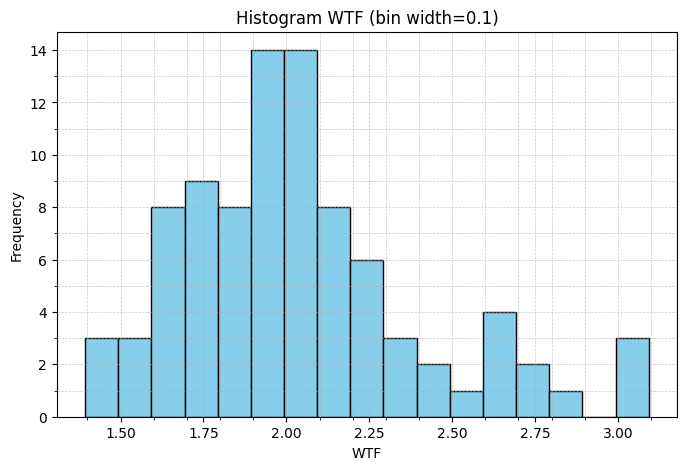


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,1.392903,1.492903,3
1,1.492903,1.592903,3
2,1.592903,1.692903,8
3,1.692903,1.792903,9
4,1.792903,1.892903,8
5,1.892903,1.992903,14
6,1.992903,2.092903,14
7,2.092903,2.192903,8
8,2.192903,2.292903,6
9,2.292903,2.392903,3


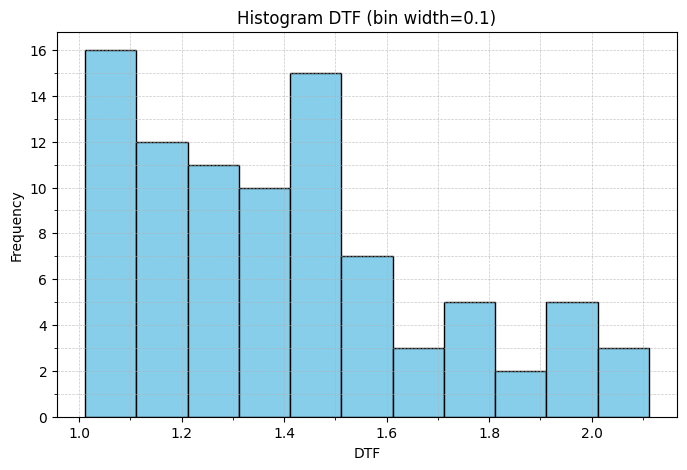


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,1.011909,1.111909,16
1,1.111909,1.211909,12
2,1.211909,1.311909,11
3,1.311909,1.411909,10
4,1.411909,1.511909,15
5,1.511909,1.611909,7
6,1.611909,1.711909,3
7,1.711909,1.811909,5
8,1.811909,1.911909,2
9,1.911909,2.011909,5


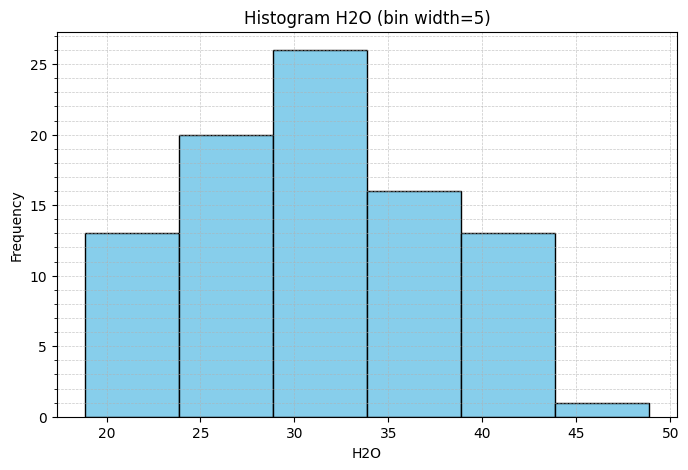


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,18.857,23.857,13
1,23.857,28.857,20
2,28.857,33.857,26
3,33.857,38.857,16
4,38.857,43.857,13
5,43.857,48.857,1


In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [126]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Belambus Selatan
Masukkan GEN_LYR: LIM
Masukkan Material: YLIM

Tabel Ringkasan tersimpan sebagai variabel: df_belambus_selatan_lim_ylim


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,LIM,YLIM,0.626324,0.998529,3.3935,31.145074,2.346824,1.898584,1.303667
